In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('data/totalData.csv')
df

C:\Users\annab\AppData\Local\Temp\ipykernel_6708\404394617.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/totalData.csv')


,Unnamed: 0,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ListingKey,ListAgentEmail,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
0,0,MLSListings,MLSListings,"Laminate,Tile",False,NaN,NaN,NaN,1077427852,bholmes@compass.com,...,NaN,7500.0,NaN,False,1.0,Other,94025,NaN,7500.0,NaN
1,1,SouthBay,SouthBay,NaN,True,NaN,NaN,True,1077370123,TeamLyon@LyonStahl.com,...,NaN,7051.0,4.0,True,2.0,Hermosa,90254,0.0,7051.0,NaN
2,2,MLSListings,MLSListings,NaN,False,NaN,NaN,NaN,1077294226,mbarrera0615@gmail.com,...,NaN,7600.0,NaN,False,1.0,Other,93906,NaN,7600.0,NaN
3,3,OutofAreaBoard,OutofAreaBoard,Wood,False,NaN,NaN,False,1077271803,EdanAmar@yahoo.com,...,50x124,6205.0,NaN,False,NaN,NaN,90046,NaN,6205.0,NaN
4,4,SanDiego,SanDiego,NaN,False,NaN,NaN,False,1077148727,doug@dougwestgroup.com,...,NaN,6378.0,NaN,False,3.0,NaN,92057,150.0,6378.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,91067,OrangeCounty,OrangeCounty,Vinyl,True,NaN,NaN,False,1038551758,patrick@patrickhourigan.com,...,NaN,3000.0,0.0,False,2.0,Capistrano Unified,92651,0.0,3000.0,NaN
91068,91068,RimOTheWorld,RimOTheWorld,"Carpet,Wood",True,NaN,NaN,False,1038339234,vickycenter@gmail.com,...,NaN,16653.0,1.0,False,2.0,Rim of the World,92352,240.0,16653.0,NaN
91069,91069,Downey,Downey,NaN,True,NaN,NaN,False,1033918791,CarlosCahuas@outlook.com,...,NaN,108900.0,4.0,False,2.0,Barstow Unified,92365,0.0,108900.0,NaN
91070,91070,Mlslistings,Mlslistings,NaN,False,NaN,NaN,NaN,1023270484,assistant@danmoskowitz.com,...,NaN,6336.0,NaN,False,2.0,Other,95121,NaN,6336.0,NaN


In [63]:
features = ['PoolPrivateYN', 'ViewYN', 'DaysOnMarket', 'NewConstructionYN', 'BedroomsTotal', 'ClosePrice', 'FireplaceYN', 
'BathroomsTotalInteger', 'YearBuilt', 'BasementYN', 'LivingArea', 'PostalCode', 'AttachedGarageYN', 'GarageSpaces']
drop_columns = df.columns.difference(features)

In [64]:
drop_columns

Index(['AboveGradeFinishedArea', 'AssociationFee', 'AssociationFeeFrequency',
       'BelowGradeFinishedArea', 'BuilderName', 'BuildingAreaTotal',
       'BusinessType', 'BuyerAgentAOR', 'BuyerAgentFirstName',
       'BuyerAgentLastName', 'BuyerAgentMlsId', 'BuyerOfficeAOR',
       'BuyerOfficeName', 'City', 'CloseDate', 'CoBuyerAgentFirstName',
       'CoListAgentFirstName', 'CoListAgentLastName', 'CoListOfficeName',
       'ContractStatusChangeDate', 'CountyOrParish', 'CoveredSpaces',
       'ElementarySchool', 'ElementarySchoolDistrict', 'FireplacesTotal',
       'Flooring', 'HighSchool', 'HighSchoolDistrict', 'Latitude', 'Levels',
       'ListAgentAOR', 'ListAgentEmail', 'ListAgentFirstName',
       'ListAgentFullName', 'ListAgentLastName', 'ListOfficeName',
       'ListingContractDate', 'ListingId', 'ListingKey', 'ListingKeyNumeric',
       'Longitude', 'LotSizeAcres', 'LotSizeArea', 'LotSizeDimensions',
       'LotSizeSquareFeet', 'MLSAreaMajor', 'MainLevelBedrooms',
       'Midd

In [65]:
df = df.drop(columns = drop_columns)
df

,ViewYN,BasementYN,PoolPrivateYN,ClosePrice,LivingArea,DaysOnMarket,AttachedGarageYN,YearBuilt,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,NewConstructionYN,GarageSpaces,PostalCode
0,False,NaN,NaN,3000000.0,1831.0,0,False,1948.0,2.0,3.0,True,False,1.0,94025
1,True,NaN,True,7750000.0,5000.0,0,True,2024.0,5.0,5.0,True,True,2.0,90254
2,False,NaN,NaN,575000.0,863.0,0,True,1950.0,1.0,2.0,True,False,1.0,93906
3,False,NaN,False,1810000.0,1338.0,0,NaN,1923.0,1.0,3.0,True,False,NaN,90046
4,False,NaN,False,1135000.0,3203.0,0,True,2009.0,4.0,4.0,False,False,3.0,92057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,True,NaN,False,4000000.0,2822.0,248,True,1977.0,3.0,4.0,True,False,2.0,92651
91068,True,NaN,False,4600000.0,5846.0,546,True,1985.0,7.0,6.0,True,False,2.0,92352
91069,True,NaN,False,170000.0,1909.0,480,True,1984.0,2.0,3.0,False,False,2.0,92365
91070,False,NaN,NaN,1071000.0,1720.0,23,True,1965.0,2.0,3.0,False,False,2.0,95121


In [66]:
df.isnull().sum()

ViewYN                    8226
BasementYN               88812
PoolPrivateYN            10858
ClosePrice                   2
LivingArea                  49
DaysOnMarket                 0
AttachedGarageYN         10136
YearBuilt                   72
BathroomsTotalInteger       17
BedroomsTotal                0
FireplaceYN                 57
NewConstructionYN         6309
GarageSpaces              3189
PostalCode                   0
dtype: int64

In [67]:
# using standard scaler
from sklearn.preprocessing import StandardScaler

df_close = (df['ClosePrice']).to_frame()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_close)

df['ClosePrice'] = scaled_data

In [68]:
df['AdditionalAttractionYN'] = df[['BasementYN', 'AttachedGarageYN', 'ViewYN', 'PoolPrivateYN']].any(axis = 1)
df = df.drop(columns = ['BasementYN', 'AttachedGarageYN', 'ViewYN', 'PoolPrivateYN'])

In [69]:
df.isnull().sum()

ClosePrice                   2
LivingArea                  49
DaysOnMarket                 0
YearBuilt                   72
BathroomsTotalInteger       17
BedroomsTotal                0
FireplaceYN                 57
NewConstructionYN         6309
GarageSpaces              3189
PostalCode                   0
AdditionalAttractionYN       0
dtype: int64

In [70]:
# lowk lost 10k rows here... but maybe thats okay...
df = df.dropna()
df

,ClosePrice,LivingArea,DaysOnMarket,YearBuilt,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,NewConstructionYN,GarageSpaces,PostalCode,AdditionalAttractionYN
0,0.850453,1831.0,0,1948.0,2.0,3.0,True,False,1.0,94025,False
1,3.184945,5000.0,0,2024.0,5.0,5.0,True,True,2.0,90254,True
2,-0.341367,863.0,0,1950.0,1.0,2.0,True,False,1.0,93906,True
4,-0.066142,3203.0,0,2009.0,4.0,4.0,False,False,3.0,92057,True
5,0.110788,2013.0,0,1969.0,2.0,4.0,True,False,2.0,95119,True
...,...,...,...,...,...,...,...,...,...,...,...
91067,1.341925,2822.0,248,1977.0,3.0,4.0,True,False,2.0,92651,True
91068,1.636808,5846.0,546,1985.0,7.0,6.0,True,False,2.0,92352,True
91069,-0.540413,1909.0,480,1984.0,2.0,3.0,False,False,2.0,92365,True
91070,-0.097597,1720.0,23,1965.0,2.0,3.0,False,False,2.0,95121,True


In [71]:
df.isnull().sum()

ClosePrice                0
LivingArea                0
DaysOnMarket              0
YearBuilt                 0
BathroomsTotalInteger     0
BedroomsTotal             0
FireplaceYN               0
NewConstructionYN         0
GarageSpaces              0
PostalCode                0
AdditionalAttractionYN    0
dtype: int64

In [72]:
# finding the age of each house instead of going off of the built year
from datetime import datetime

df['YearBuilt'] = df['YearBuilt'].astype('Int64')
current_year = datetime.now().year
df['Age'] = current_year - df['YearBuilt']
df = df.drop(columns='YearBuilt')

In [73]:
# want to ask claire about how to handle postal code (want to replace it with the median housing price for that zip code, 
# but potentially no info and im not sure which data csv to use...) gonna just make codes for now

df["PostalCode"] = df["PostalCode"].astype("category").cat.codes

In [74]:
df

,ClosePrice,LivingArea,DaysOnMarket,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,NewConstructionYN,GarageSpaces,PostalCode,AdditionalAttractionYN,Age
0,0.850453,1831.0,0,2.0,3.0,True,False,1.0,850,False,77
1,3.184945,5000.0,0,5.0,5.0,True,True,2.0,81,True,1
2,-0.341367,863.0,0,1.0,2.0,True,False,1.0,821,True,75
4,-0.066142,3203.0,0,4.0,4.0,False,False,3.0,344,True,16
5,0.110788,2013.0,0,2.0,4.0,True,False,2.0,1498,True,56
...,...,...,...,...,...,...,...,...,...,...,...
91067,1.341925,2822.0,248,3.0,4.0,True,False,2.0,558,True,48
91068,1.636808,5846.0,546,7.0,6.0,True,False,2.0,466,True,40
91069,-0.540413,1909.0,480,2.0,3.0,False,False,2.0,472,True,41
91070,-0.097597,1720.0,23,2.0,3.0,False,False,2.0,1500,True,60


In [75]:
# so there's 1841 diff postal codes...
df.groupby('PostalCode').agg('count').reset_index()

,PostalCode,ClosePrice,LivingArea,DaysOnMarket,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,NewConstructionYN,GarageSpaces,AdditionalAttractionYN,Age
0,0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1836,1836,1,1,1,1,1,1,1,1,1,1
1837,1837,1,1,1,1,1,1,1,1,1,1
1838,1838,1,1,1,1,1,1,1,1,1,1
1839,1839,7,7,7,7,7,7,7,7,7,7


In [76]:
# can't have objects..?

df["FireplaceYN"] = df["FireplaceYN"].astype("boolean")
df["NewConstructionYN"] = df["NewConstructionYN"].astype("boolean")

In [77]:
X = df.drop(columns=["ClosePrice"])
Y = df["ClosePrice"]

In [78]:
print(X.shape)
print(Y.shape)

(81512, 10)
(81512,)


In [79]:
import numpy as np        # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from xgboost import XGBRegressor   # For XGBoost Regressor model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [81]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [89]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [90]:
Y_pred = model.predict(X_test)

In [91]:
mse = mean_squared_error(Y_test, Y_pred)  # Calculate the Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # Calculate R-squared (how well the model fits the data)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.912833474073847
R-squared: 0.18309296328017965


In [92]:
print(f'Feature Importances: {model.feature_importances_}')

Feature Importances: [0.2633922  0.195037   0.1273653  0.01595924 0.12709421 0.01273234
 0.02011007 0.08705521 0.01198222 0.13927221]


<Axes: xlabel='ClosePrice'>

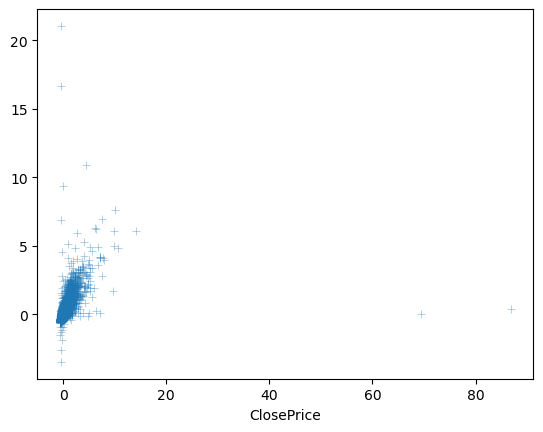

In [93]:
import seaborn as sns
sns.scatterplot(x=Y_test, y=Y_pred, marker = '+', alpha = 0.5)